# Modelo ML interpretabilidad con herramienta ELI5

Samir Hassan - 2190041

Gabriel Jeannot - 2185887

Carlos Osorio - 2230894

Luis Pareja - 2185833

Diego Perea - 2185751

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=ed640f0ab50e891ac3a8d4a3050f89e11c2152bac90f2fe5c3d6cbbd11591391
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

data = pd.read_csv(url, names=column_names)
# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

data.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


X = data.iloc[:, :-1]: En esta línea se crea una variable X que contiene los datos de entrada o características del conjunto de datos. iloc es una función de Pandas que permite la selección de filas y columnas por su posición numérica. El índice [:, :-1] indica que se seleccionan todas las filas y todas las columnas excepto la última, ya que se asume que la última columna contiene las etiquetas o valores objetivo del conjunto de datos.

y = data.iloc[:, -1]: Aquí se crea una variable y que contiene las etiquetas o valores objetivo del conjunto de datos. El índice [:, -1] indica que se selecciona la última columna del conjunto de datos.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): En esta línea se divide el conjunto de datos en dos partes: un conjunto de entrenamiento (X_train e y_train) y un conjunto de prueba (X_test e y_test). La función train_test_split de la librería Scikit-learn es utilizada para realizar la división. Se le pasa como parámetros las características (X) y las etiquetas (y) del conjunto de datos original, el tamaño que tendrá el conjunto de prueba (test_size) que en este caso es del 20%, y random_state es una semilla utilizada para la generación de números aleatorios y asegurarnos de que la división del conjunto de datos es reproducible.

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 el paquete eli5 para calcular la importancia de cada característica (feature) del modelo y guardarla en la variable weights.

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import eli5

# Crear una instancia del modelo de regresión logística
model = LogisticRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Obtener los pesos de las características
weights = eli5.explain_weights(model, feature_names=X.columns.tolist())

# Imprimir los pesos de las características
print(weights)

# Predecir los valores en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión de las predicciones en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión de las predicciones en el conjunto de prueba
print("Precisión en el conjunto de prueba:", accuracy)



Explanation(estimator='LogisticRegression()', description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='DiabetesPedigreeFunction', weight=0.6196588309971777, std=None, value=None), FeatureWeight(feature='BMI', weight=0.10116537641356443, std=None, value=None), FeatureWeight(feature='Pregnancies', weight=0.06642219797694897, std=None, value=None), FeatureWeight(feature='Age', weight=0.0347075798

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from eli5 import show_prediction

show_prediction(model, X_test.iloc[0], show_feature_values=True)


La salida de show_prediction muestra la contribución de cada variable en el modelo para predecir la clase de la observación de prueba seleccionada. La tabla muestra las características más importantes ordenadas por su contribución al modelo

En este caso, el modelo predijo la clase 0 con una probabilidad del 72.4% y un puntaje de -0.967. La característica más importante en esta predicción es la variable BloodPressure con una contribución positiva de 0.802. Las variables Insulin, SkinThickness, DiabetesPedigreeFunction, Pregnancies, Age, Glucose y BMI también influyen en la predicción del modelo. Las variables con una contribución positiva, como BloodPressure e Insulin, indican que valores más altos de estas variables aumentan la probabilidad de que la observación pertenezca a la clase 0, mientras que las variables con una contribución negativa, como Age, Glucose y BMI, indican que valores más bajos de estas variables aumentan la probabilidad de que la observación pertenezca a la clase 0.

# Clasificacion de imagenes con Herramienta ELI5 interpretabilidad

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import array_to_img
import eli5
from eli5.sklearn import explain_prediction

# Cargar el conjunto de datos de dígitos
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión logística
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluar la precisión del modelo
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)





Accuracy: 0.9722222222222222


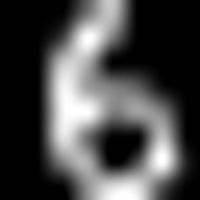

In [ ]:
# Obtener una muestra de datos de prueba y su etiqueta real
sample_idx = 0
sample_data = X_test[sample_idx]
sample_label = y_test[sample_idx]

# Obtener una predicción del modelo para la muestra de datos
sample_prediction = clf.predict(sample_data.reshape(1, -1))[0]

# Obtener una explicación de la predicción del modelo utilizando eli5
explanation = eli5.explain_prediction(clf, sample_data, feature_names=digits.feature_names)


# Mostrar la imagen de la muestra de datos
img = array_to_img(sample_data.reshape(8, 8, 1))

# Cambiar tamaño de la imagen
img = img.resize((200, 200))

# Mostrar la imagen
display(img)


In [ ]:

# Mostrar la etiqueta real y la predicción del modelo
print("Real label:", sample_label)
print("Model prediction:", sample_prediction)

# Mostrar la explicación de la predicción del modelo
display(explanation)

Real label: 6
Model prediction: 6


Explanation(estimator='LogisticRegression(max_iter=10000)', description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='pixel_5_2', weight=3.486186441746126, std=None, value=14.0), FeatureWeight(feature='<BIAS>', weight=2.954158010305582, std=None, value=1.0), FeatureWeight(feature='pixel_1_3', weight=2.3450083830965505, std=None, value=16.0), FeatureWeight(feature='pixel_3_2', weight=2.0345025107957793, std=None, value=15.0), FeatureWeight(feature='pixel_7_3', weight=1.5285949571907287, std=None, value=9.0), FeatureWeight(feature='pixel_6_2', weight=1.065204264298235, std=None, value=8.0), FeatureWeight(feature='pixel_2_2', weight=0.735365987810799, std=None, value=12.0), FeatureWeight(feature='pixel_4_6', weight=0.5407688014559437, std=None, value=8.0), FeatureWeight(feature='pixel_4_2', weight=0.5399456349499233, std=None, value=15.0), FeatureWeight(feature='pixel_0_3', weight=0.41476360824704184, std=None, value=7.0), FeatureWeight(feature='pixel_4_5', weight=0.38087711134440905, std=None, value=10.0), FeatureWeight(feature='pixel_5_6', weight=0.3700920466026886, std=None, value=12.0), FeatureWeight(feature='pixel_3_5', weight=0.284255112140045, std=None, value=6.0), FeatureWeight(feature='pixel_0_4', weight=0.1999195723086732, std=None, value=12.0), FeatureWeight(feature='pixel_6_5', weight=0.11597137103628094, std=None, value=5.0), FeatureWeight(feature='pixel_1_4', weight=0.07704579532008744, std=None, value=8.0), FeatureWeight(feature='pixel_3_6', weight=0.059826549738125526, std=None, value=1.0)], neg=[FeatureWeight(feature='pixel_3_4', weight=-3.312560711857068, std=None, value=8.0), FeatureWeight(feature='pixel_4_4', weight=-2.6550120764046596, std=None, value=8.0), FeatureWeight(feature='pixel_4_3', weight=-1.6555663937394645, std=None, value=16.0), FeatureWeight(feature='pixel_5_3', weight=-1.2405788530471957, std=None, value=7.0), FeatureWeight(feature='pixel_7_4', weight=-0.9615609042728872, std=None, value=14.0), FeatureWeight(feature='pixel_3_3', weight=-0.8633459860879023, std=None, value=10.0), FeatureWeight(feature='pixel_6_3', weight=-0.861926876101684, std=None, value=11.0), FeatureWeight(feature='pixel_7_5', weight=-0.5477104550724413, std=None, value=14.0), FeatureWeight(feature='pixel_2_3', weight=-0.4945724957810787, std=None, value=11.0), FeatureWeight(feature='pixel_6_6', weight=-0.37729942500548147, std=None, value=16.0), FeatureWeight(feature='pixel_1_2', weight=-0.1390578252765018, std=None, value=4.0), FeatureWeight(feature='pixel_7_6', weight=-0.0706511363235479, std=None, value=5.0), FeatureWeight(feature='pixel_6_7', weight=-0.009101689445829944, std=None, value=2.0)], pos_remaining=0, neg_remaining=0), proba=6.394662805650272e-08, score=3.943541329971275, weighted_spans=None, heatmap=None), TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='pixel_2_3', weight=7.6628087724804885, std=None, value=11.0), FeatureWeight(feature='pixel_7_4', weight=3.1781030221473574, std=None, value=14.0), FeatureWeight(feature='pixel_7_5', weight=3.1087207399062264, std=None, value=14.0), FeatureWeight(feature='pixel_4_2', weight=2.784833365467803, std=None, value=15.0), FeatureWeight(feature='pixel_5_3', weight=2.632408269316047, std=None, value=7.0), FeatureWeight(feature='pixel_1_4', weight=2.2607444262740484, std=None, value=8.0), FeatureWeight(feature='pixel_3_4', weight=1.9691521619298595, std=None, value=8.0), FeatureWeight(feature='pixel_5_2', weight=1.5182979094719455, std=None, value=14.0), FeatureWeight(feature='pixel_3_3', weight=1.3453755188868706, std=None, value=10.0), FeatureWeight(feature='pixel_0_3', weight=1.1595260155310778, std=None, value=7.0), FeatureWeight(feature='pixel_4_4', weight=1.0137650156916824, std=None, value=8.0), FeatureWeight(feature='pixel_4_5', weight=0.9385279032406525, std=None, value=10.0), FeatureWeight(feature='pixel_3_5', we

La tabla representa la contribución de cada característica (pixel) a la predicción de una imagen en particular. En este caso, la imagen fue clasificada en la categoría "y=0", es decir, el modelo predijo que la imagen representa el dígito 0.

En la tabla, la columna "probability" muestra la probabilidad estimada de que la imagen pertenezca a la categoría "y=6". En este caso, la probabilidad es de 1.000, lo que indica que el modelo está muy seguro de que la imagen representa el dígito 6.

La columna "score" muestra la contribución de cada característica a la predicción del modelo. Los valores positivos indican que la característica contribuye positivamente a la predicción de la categoría "y=6", mientras que los valores negativos indican una contribución negativa.

En la tabla se muestran los diferentes píxeles de la imagen y su contribución al modelo. Los píxeles con contribución positiva están resaltados en verde y aquellos con contribución negativa están resaltados en rojo.

Por ejemplo, se puede ver que el pixel_5_2 tiene una contribución positiva de 6.761, lo que significa que un valor más alto de este pixel aumenta la probabilidad de que la imagen pertenezca a la categoría específica. De manera similar, se puede ver que el pixel_1_4 tiene una contribución negativa de -2.140, lo que significa que un valor más alto de este pixel disminuye la probabilidad de que la imagen pertenezca a la categoría específica.

En resumen, esta tabla muestra cómo diferentes píxeles contribuyen al modelo de clasificación y cómo afectan la probabilidad de que la imagen pertenezca a la categoría específica.







- https://eli5.readthedocs.io/en/latest/tutorials/index.html
- https://eli5.readthedocs.io/en/latest/tutorials/keras-image-classifiers.html